# Tools and libraries for image processing in Python

**In this lecture, we will learn**
- which libraries are popular for image analysis in Python
- and their common pitfalls.

# Sidenote: Markdown

- Markdown is a lightweight markup language for creating formatted text using a plain-text editor. 

<figure class="image">
  <img src="../figures/preliminaries-markdown_logo.svg" alt="" style="width: 1.6in"/>
</figure>

https://www.markdownguide.org/

- We can use various font styles, e.g.  
  
  Regular text, then **bold**, *italic*, ***bold and italic***
- We can also write math, e.g.  
  
  $$\frac{a^2}{(\log \sqrt p)}$$

- Code reference may look like `this_is_name_of_variable`
- Markdown supports syntax highlighting for various languages, e.g.  
  Python  
  ``` python
  class A:
      pass
  ```
  or Javascript  
  ``` javascript
  let x = Math.Random()
  ```
  even Markdown itself  
  ``` markdown
  regular, **bold**, *italic*, ...
  ```

# Numpy

- NumPy is a library with support for large, multi-dimensional arrays and matrices, along with a large collection of high-level mathematical functions to operate on these arrays.

<figure class="image">
  <img src="../figures/preliminaries-numpy_logo.svg" alt="" style="width: 1.6in"/>
</figure>

https://numpy.org/

In [1]:
import numpy as np

In [2]:
np.arange(12)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11])

In [3]:
m = np.arange(12).reshape(3, 4)
m

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]])

In [4]:
type(m), m.shape, m.dtype

(numpy.ndarray, (3, 4), dtype('int64'))

In [5]:
type(m.shape)

tuple

In [6]:
m[1, 2]

np.int64(6)

In [7]:
m.T

array([[ 0,  4,  8],
       [ 1,  5,  9],
       [ 2,  6, 10],
       [ 3,  7, 11]])

## Indexing

In [8]:
m

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]])

In [9]:
r = m[0, :]
r

array([0, 1, 2, 3])

In [10]:
r.shape

(4,)

In [11]:
type(r.shape), len(r.shape)

(tuple, 1)

In [12]:
m[0]

array([0, 1, 2, 3])

In [13]:
m[:, 1]

array([1, 5, 9])

In [14]:
m[:, 1].shape

(3,)

In [15]:
m[:, 1:]

array([[ 1,  2,  3],
       [ 5,  6,  7],
       [ 9, 10, 11]])

In [16]:
m[:2, :]

array([[0, 1, 2, 3],
       [4, 5, 6, 7]])

In [17]:
m[:, 1:2]

array([[1],
       [5],
       [9]])

In [18]:
m[:, [1]]

array([[1],
       [5],
       [9]])

In [19]:
m[:, [1]].shape

(3, 1)

In [20]:
m[:, 1::2]

array([[ 1,  3],
       [ 5,  7],
       [ 9, 11]])

In [21]:
m[:, [0, 2]]

array([[ 0,  2],
       [ 4,  6],
       [ 8, 10]])

In [22]:
m[:, [-1, 2]]

array([[ 3,  2],
       [ 7,  6],
       [11, 10]])

In [23]:
m[-2]

array([4, 5, 6, 7])

## View vs copy

In [24]:
m

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]])

In [25]:
r = m[0, :]
r

array([0, 1, 2, 3])

In [26]:
r[0] = -1
r

array([-1,  1,  2,  3])

In [27]:
m

array([[-1,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]])

In [28]:
r_copy = m[0, :].copy()
r_copy

array([-1,  1,  2,  3])

In [29]:
r_copy[0] = -2
r_copy

array([-2,  1,  2,  3])

In [30]:
m

array([[-1,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]])

## Broadcasting

In [31]:
m

array([[-1,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]])

In [32]:
m + 1

array([[ 0,  2,  3,  4],
       [ 5,  6,  7,  8],
       [ 9, 10, 11, 12]])

In [33]:
a = np.arange(5).reshape(5, 1)
a

array([[0],
       [1],
       [2],
       [3],
       [4]])

In [34]:
b = np.arange(3).reshape(1, 3)
b

array([[0, 1, 2]])

In [35]:
a + b

array([[0, 1, 2],
       [1, 2, 3],
       [2, 3, 4],
       [3, 4, 5],
       [4, 5, 6]])

## Divide each row of `m` by its sum

- As an example, let's say we want to normalize each row by its sum.
- After the normalization, each row should sum to 1.0.

In [36]:
m

array([[-1,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]])

### Naive Python way using for loops

In [37]:
m_norm = np.zeros(m.shape)
for i in range(m.shape[0]):
    s = 0.0
    for j in range(m.shape[1]):
        s += m[i, j]
    m_norm[i, :] = m[i, :] / s
m_norm

array([[-0.2       ,  0.2       ,  0.4       ,  0.6       ],
       [ 0.18181818,  0.22727273,  0.27272727,  0.31818182],
       [ 0.21052632,  0.23684211,  0.26315789,  0.28947368]])

### Vectorized way using NumPy's broadcasting

In [38]:
m.sum()

np.int64(65)

In [39]:
m.sum(axis=0)

array([11, 15, 18, 21])

In [40]:
m.sum(axis=1)

array([ 5, 22, 38])

In [41]:
try:
    m / m.sum(axis=1)
except ValueError as e:
    print(e)

operands could not be broadcast together with shapes (3,4) (3,) 


In [42]:
m.sum(axis=1).reshape(-1, 1)

array([[ 5],
       [22],
       [38]])

In [43]:
m.sum(axis=1, keepdims=True)

array([[ 5],
       [22],
       [38]])

In [44]:
m_norm = m / m.sum(axis=1, keepdims=True)
m_norm

array([[-0.2       ,  0.2       ,  0.4       ,  0.6       ],
       [ 0.18181818,  0.22727273,  0.27272727,  0.31818182],
       [ 0.21052632,  0.23684211,  0.26315789,  0.28947368]])

In [45]:
m_norm.sum(axis=1)

array([1., 1., 1.])

# Matplotlib

- Matplotlib is a comprehensive library for creating static, animated, and interactive visualizations in Python.

<figure class="image">
  <img src="../figures/preliminaries-matplotlib_logo.svg" alt="" style="width: 1.6in"/>
</figure>

https://matplotlib.org/

In [46]:
import matplotlib.pyplot as plt

In [47]:
t = np.linspace(0., 1., 100)
x = np.sin(2. * np.pi * t)

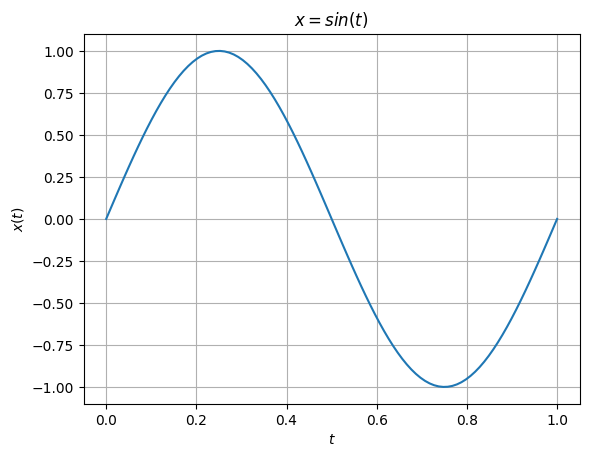

In [48]:
plt.plot(t, x);
plt.xlabel('$t$');
plt.ylabel('$x(t)$');
plt.title('$x = sin(t)$');
plt.grid();

In [49]:
xx = x.reshape(-1, 1) * x.reshape(1, -1)
xx.shape, xx.dtype, xx.min(), xx.max()

((100, 100),
 dtype('float64'),
 np.float64(-0.9997482711915926),
 np.float64(0.9997482711915926))

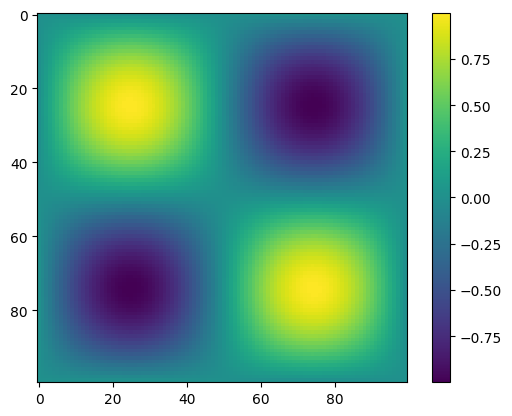

In [50]:
plt.imshow(xx);
plt.colorbar();

In [51]:
tx, ty = np.meshgrid(t, t)
print(tx.shape, tx.dtype, tx.min(), tx.max())
print(ty.shape, ty.dtype, ty.min(), ty.max())

(100, 100) float64 0.0 1.0
(100, 100) float64 0.0 1.0


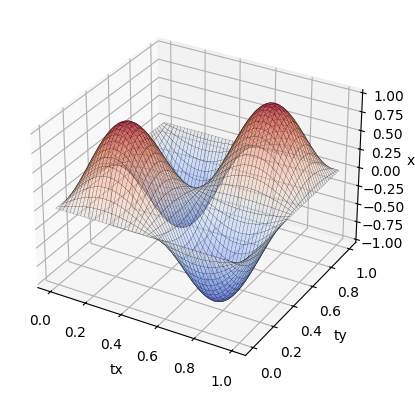

In [52]:
ax = plt.figure().add_subplot(projection='3d')
ax.plot_surface(tx, ty, xx, cmap='coolwarm', ec='k', lw=0.1, alpha=0.5);
ax.set_xlabel('tx');
ax.set_ylabel('ty');
ax.set_zlabel('xx');
# ax.view_init(elev=30, azim=120, roll=0);

# Seaborn

- Seaborn is a Python data visualization library based on matplotlib. It provides a high-level interface for drawing attractive and informative statistical graphics.

<figure class="image">
  <img src="../figures/preliminaries-seaborn_logo.svg" alt="" style="width: 1.6in"/>
</figure>

https://seaborn.pydata.org/

In [53]:
import seaborn as sns

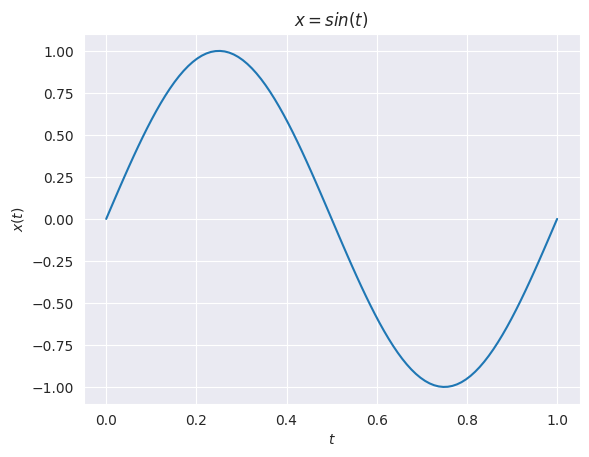

In [54]:
with sns.axes_style(style='darkgrid'):
    plt.plot(t, x);
    plt.xlabel('$t$');
    plt.ylabel('$x(t)$');
    plt.title('$x = sin(t)$');

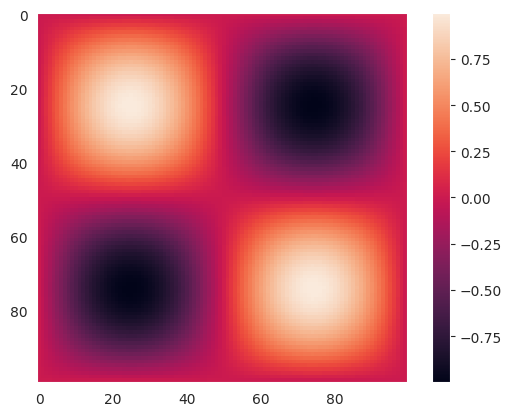

In [55]:
with sns.axes_style(style='dark'):
    plt.imshow(xx);
    plt.colorbar();

# Scikit-image

- scikit-image is a collection of algorithms for image processing.
- It includes algorithms for segmentation, geometric transformations, color space manipulation, analysis, filtering, morphology, feature detection, and more.
- It is designed to interoperate with the Python numerical and scientific libraries NumPy and SciPy.

<figure class="image">
  <img src="../figures/preliminaries-skimage_logo.png" alt="" style="width: 1.6in"/>
</figure>

https://scikit-image.org/

In [56]:
import skimage

In [57]:
rgb = skimage.io.imread('../data/kitten.jpg')
type(rgb), rgb.shape, rgb.dtype, rgb.min(), rgb.max()

(numpy.ndarray, (3396, 3396, 3), dtype('uint8'), np.uint8(0), np.uint8(255))

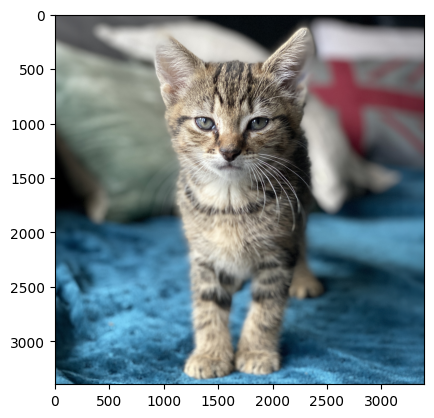

In [58]:
plt.imshow(rgb);

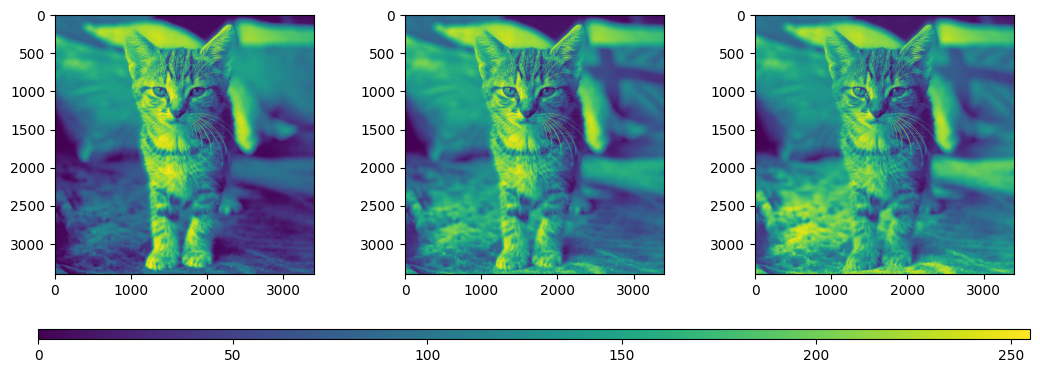

In [59]:
fig, axes = plt.subplots(1, 3, figsize=plt.figaspect(0.375))
im = axes[0].imshow(rgb[:, :, 0])  # R
im = axes[1].imshow(rgb[:, :, 1])  # G
im = axes[2].imshow(rgb[:, :, 2]);  # B
fig.colorbar(im, ax=axes, orientation='horizontal', aspect=100);

In [60]:
gray = skimage.color.rgb2gray(rgb)
gray.shape, gray.dtype, gray.min(), gray.max()

((3396, 3396), dtype('float64'), np.float64(0.0), np.float64(1.0))

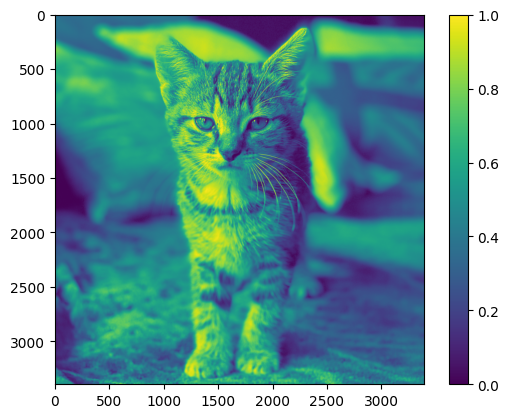

In [61]:
plt.imshow(gray)
plt.colorbar();

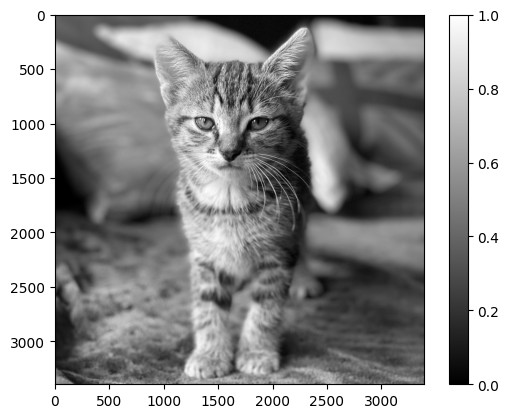

In [62]:
plt.imshow(gray, cmap='gray', vmin=0, vmax=1)
plt.colorbar();

## uint8 vs float images

In [63]:
rgb / 255.

array([[[0.4       , 0.45490196, 0.45882353],
        [0.40392157, 0.44705882, 0.45490196],
        [0.38823529, 0.42352941, 0.44313725],
        ...,
        [0.14509804, 0.19607843, 0.22745098],
        [0.19215686, 0.25098039, 0.27843137],
        [0.18823529, 0.25490196, 0.28235294]],

       [[0.39215686, 0.44705882, 0.45098039],
        [0.39607843, 0.43921569, 0.44705882],
        [0.38823529, 0.41568627, 0.43921569],
        ...,
        [0.14117647, 0.19215686, 0.22352941],
        [0.18823529, 0.24705882, 0.2745098 ],
        [0.19215686, 0.25098039, 0.27843137]],

       [[0.38431373, 0.42745098, 0.43529412],
        [0.38431373, 0.42352941, 0.43137255],
        [0.37254902, 0.40392157, 0.41568627],
        ...,
        [0.12941176, 0.17254902, 0.19607843],
        [0.16078431, 0.21176471, 0.23529412],
        [0.15686275, 0.21568627, 0.23529412]],

       ...,

       [[0.4745098 , 0.55686275, 0.63137255],
        [0.4745098 , 0.55686275, 0.63921569],
        [0.47058824, 0

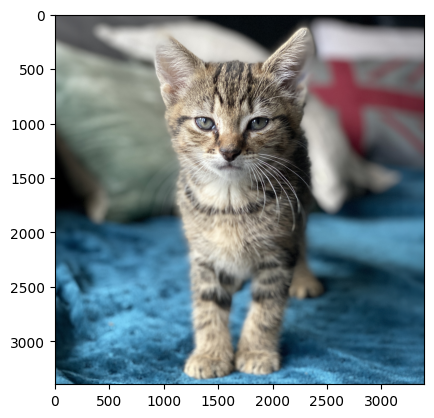

In [64]:
plt.imshow(rgb / 255.);

`plt.imshow` also examines the `dtype` of the argument and then decides:
- `uint8` dtype will be rendered with zeros meaning minimum and 255 meaning maximum value
- `float32` or `float` dtype will be rendered with zeros meaning minimum and 1 meaning maximum value

Any value of `float` dtype larger than one will be rendered as white too, so if we don't divide by 255, we'll get an almost white output:

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..255.0].


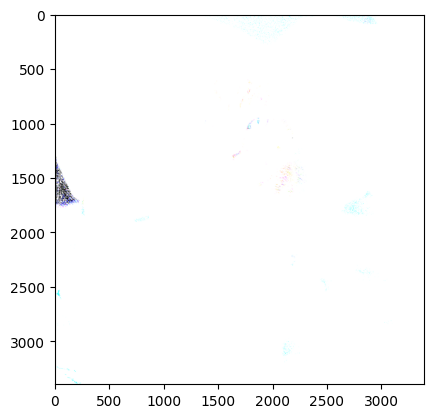

In [65]:
plt.imshow(rgb.astype(float));

The proper way to convert data type of images in scikit-image is to use `skimage.utils.img_as_xxx` like so:

In [66]:
rgb_f = skimage.util.img_as_float(rgb)  # convert to float dtype (0..1)
rgb_b = skimage.util.img_as_ubyte(rgb_f)  # convert back to unsigned byte (0..255)

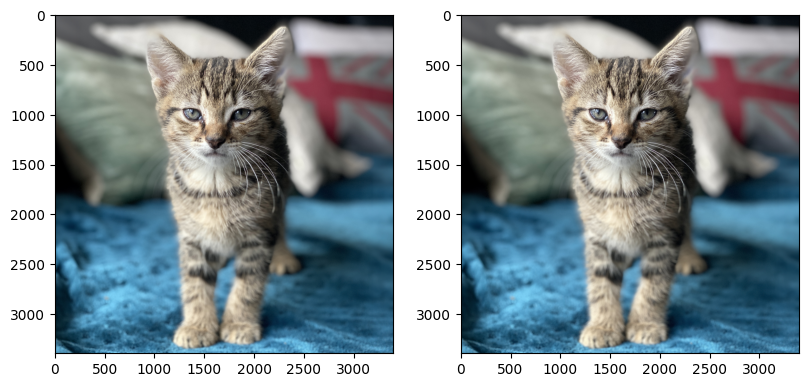

In [67]:
fig, axes = plt.subplots(1, 2, figsize=plt.figaspect(0.5))
axes[0].imshow(rgb_f)
axes[1].imshow(rgb_b);

# OpenCV

- OpenCV (Open Source Computer Vision) is a library of programming functions mainly for real-time computer vision.
- It includes
  - 2D and 3D feature toolkits,
  - Facial recognition system,
  - Gesture recognition,
  - Human–computer interaction (HCI),
  - Mobile robotics,
  - Motion understanding,
  - Object detection,
  - Segmentation and recognition,
  - Stereo vision,
  - Structure from motion,
  - Motion video tracking,
  - and others.
- Also includes machine learning algorithms, e.g. Boosting, Decision tree learning, Support vector machine (SVM), Deep neural networks, and others.

<figure class="image">
  <img src="../figures/preliminaries-opencv_logo.webp" alt="" style="width: 1.6in"/>
</figure>

https://opencv.org/

In [68]:
import cv2 as cv

In [69]:
bgr = cv.imread('../data/kitten.jpg')
type(bgr), bgr.shape, bgr.dtype

(numpy.ndarray, (3396, 3396, 3), dtype('uint8'))

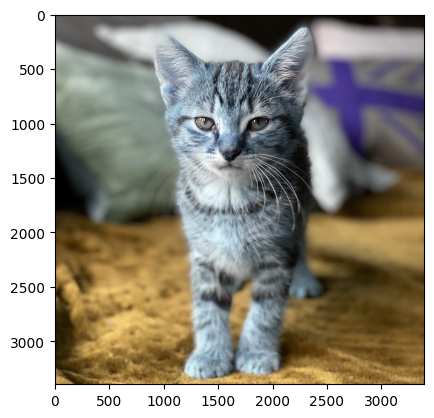

In [70]:
plt.imshow(bgr);

`plt.imshow` first examines the input argument (`bgr` in our case), and if it's an `ndarray` with shape `(height, width, 3)`, then it will render it as an RGB image, meaning it will expect that `bgr[:, :, 0]` is the red channel, but this is not the case when read using `cv.imread` function. This is the reason that the color channels are in reversed order in the picture above.

In order to correct this, we will reverse the channels after we read the image using numpy indexing `[..., ::-1]`.

In [71]:
rgb_cv = cv.imread('../data/kitten.jpg')[..., ::-1]
type(rgb_cv), rgb_cv.shape, rgb_cv.dtype

(numpy.ndarray, (3396, 3396, 3), dtype('uint8'))

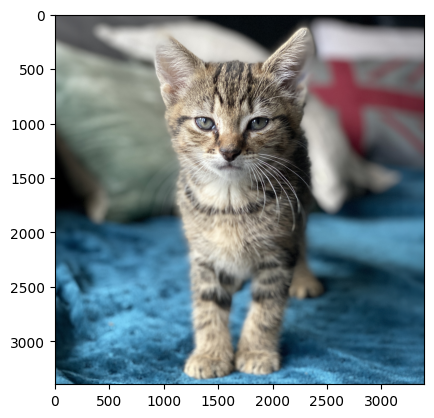

In [72]:
plt.imshow(rgb_cv);

In [73]:
np.abs(rgb - rgb_cv).sum()  # the same image as from skimage

np.uint64(0)